# Lecture 12
## Scipy: Linear algebra

Scipy provides fundamental algorithms for scientific computing. Most of these algorithms are written in languages like C, C++ or FORTRAN for fast and highly optimized execution.

Let us install scipy first.

In [ ]:
%pip install --user scipy

In [1]:
import scipy.linalg as la
import numpy as np

Let us consider a matrix $\mathbf{A}$ and a vector $b$

In [2]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
A

array([[ 3,  2,  0],
       [ 1, -1,  0],
       [ 0,  5,  1]])

In [3]:
b = np.array([2, 4, -1])

### Inverse
We cannot directly compute inverse of the matrix using power.

In [4]:
A**(-1)

ValueError: Integers to negative integer powers are not allowed.

We can invert it using the scipy function.

In [5]:
A_inv = la.inv(A)
A_inv

array([[ 0.2,  0.4,  0. ],
       [ 0.2, -0.6,  0. ],
       [-1. ,  3. ,  1. ]])

And we can verify that $\mathbf{A} \cdot \mathbf{A}^{-1} = \mathbf{I}$. Note that the off-diagonal elements $\to 0$

In [6]:
A@A_inv

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.77555756e-17,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.44089210e-16,  1.00000000e+00]])

However, if we have a singular matrix...

In [7]:
sing = np.array([[0,1],[0,1]])

The inverse is not defined.

In [8]:
la.inv(sing)

LinAlgError: singular matrix

### Determinant
Speaking of which, we also get the determinant.

In [9]:
la.det(A)

-5.0

And, as defined for a singular matrix $det(\mathbf{A}) = 0$

In [10]:
la.det(sing)

0.0

### Norm
Similarly, we can also get the norm.

In [11]:
b

array([ 2,  4, -1])

In [12]:
la.norm(b)

4.58257569495584

By default, it is the 2-norm defined as $||b||_2 = \sqrt{\sum_{i} ({b_{i}}^2)}$

In [13]:
(b**2).sum()**(1/2)

4.58257569495584

We can also have any general norm, given by $||b||_n = \sqrt[n]{\sum_{i} (|b_{i}|^n)}$.

Here, infinite norm is basically the max

In [14]:
la.norm(b,ord=np.inf)

4.0

Similarly, we can get the norm for a matrix

In [15]:
A

array([[ 3,  2,  0],
       [ 1, -1,  0],
       [ 0,  5,  1]])

In [16]:
la.norm(A)

6.4031242374328485

In [17]:
(A**2).sum()**(1/2)

6.4031242374328485

### Solving linear equations
We can solve a system of linear equations with linear algebra

Consider, the following system

$$3 x_1 + 2 x_2 = 2$$
$$x_1 - x_2 = 4$$
$$5 x_2 + x_3 = -1$$

We can write it as

$$ \mathbf{A}x = b$$

Where,
$$A = \begin{bmatrix}
3 & 2 & 0\\
1 & -1 & 0\\
0 & 5 & 1 
\end{bmatrix}$$
$$b = \begin{bmatrix}
2\\
4\\
-1
\end{bmatrix}$$

In [18]:
print('A =')
print(A)
print('b =', b)

A =
[[ 3  2  0]
 [ 1 -1  0]
 [ 0  5  1]]
b = [ 2  4 -1]


We can use solve to get x

In [19]:
x = la.solve(A, b)
x

array([ 2., -2.,  9.])

And, we can verify that $ \mathbf{A}x = b$ is indeed a solution

In [20]:
A@x

array([ 2.,  4., -1.])

In [21]:
b

array([ 2,  4, -1])

Although we can do it with inverse, it is generally a bad idea especially for large matrices. 

In [22]:
A_inv@b

array([ 2., -2.,  9.])

Let's say we have data for x and y.

In [23]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

And, we have to fit an equation through these data points.
$$ y = a + bx^2 $$
We can do linear least squares using linear algebra with 
$$ M = \begin{bmatrix}
1 & x_1^2\\
1 & x_2^2\\
\vdots & \vdots\\
1 & x_n^2\\
\end{bmatrix}$$
$$p = \begin{bmatrix}
a\\
b
\end{bmatrix}$$
$$M p \approx y$$


In [24]:
M = np.vstack((np.ones_like(y),x**2)).T
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

One way to solve it, it to project M and y onto M.

In [25]:
M_proj = M.T@M
M_proj

array([[7.0000000e+00, 1.8175000e+02],
       [1.8175000e+02, 8.6921875e+03]])

In [26]:
y_proj = M.T@y
y_proj

array([  23.3, 1082.3])

And solve it.

In [27]:
p = la.solve(M_proj, y_proj)
p

array([0.20925829, 0.12013861])

Alternatively, we can use the scipy function

In [28]:
p, res, rnk, s= la.lstsq(M,y)
p

array([0.20925829, 0.12013861])

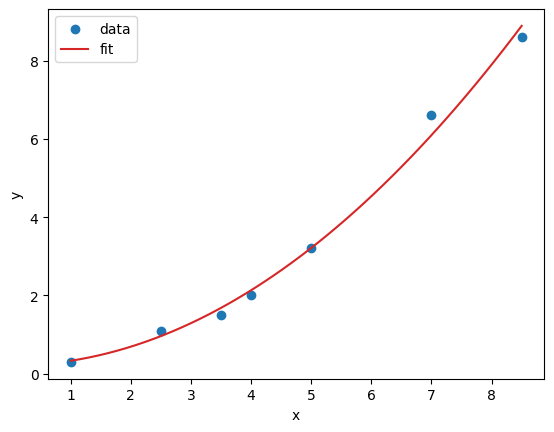

In [29]:
import matplotlib.pyplot as plt
x_fit = np.linspace(x[0],x[-1])
y_fit = p[0] + p[1]*x_fit**2
plt.scatter(x,y,label='data')
plt.plot(x_fit,y_fit,label='fit',c='tab:red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Eigenvalues and Eigenvectors

A scalar $\lambda$ and a vector $v$ which satisfy the condition
$$ \mathbf{A} v = \lambda v$$
are the eigenvalue and corresponding eigenvector of a matrix $\mathbf{A}$

We can get the eigenvalues and corresponding eigenvector with `eig`.

In [30]:
eval, evec = la.eig(A)
evec

array([[ 0.        ,  0.19399248, -0.89052821],
       [ 0.        , -0.43158379, -0.20014165],
       [ 1.        ,  0.88096671, -0.40853743]])

In [31]:
for i in range(len(eval)):
    lam = eval[i]
    v = evec[:,i]
    print(lam,v)

(1+0j) [0. 0. 1.]
(-1.4494897427831788+0j) [ 0.19399248 -0.43158379  0.88096671]
(3.449489742783178+0j) [-0.89052821 -0.20014165 -0.40853743]


We can rewrite as
$$ \mathbf{A} v - \lambda v = 0$$
and this can be used to verify

In [32]:
for i in range(len(eval)):
    lam = eval[i]
    v = evec[:,i]
    l = (A@v - lam*v)
    print(l)

[0.+0.j 0.+0.j 0.+0.j]
[ 5.55111512e-17+0.j -3.33066907e-16+0.j  0.00000000e+00+0.j]
[-4.44089210e-16+0.j -2.22044605e-16+0.j  0.00000000e+00+0.j]


We can get only the eigenvalues with the `eigvals` function.

In [33]:
la.eigvals(A)

array([ 1.        +0.j, -1.44948974+0.j,  3.44948974+0.j])

Characteristic polynomial is given by:
$$ p_A(\lambda) = det(\mathbf{A} - \lambda \mathbf{I}) = 0 $$

For a 2x2 matrix
$$\lambda^2 - \lambda tr(A) + det(A)= 0$$


In [34]:
A2 = np.array([[1,2],[3,4]])
eval2 = la.eigvals(A2)
tr = np.trace(A2)
det = la.det(A2)
print(eval2)

[-0.37228132+0.j  5.37228132+0.j]


In [35]:
for lam in eval2.real:
    print(lam**2 - lam*tr + det)

-2.220446049250313e-16
0.0


### Root finding

In [36]:
from scipy import optimize

We can find the roots of polynomials. Let us take the characteristic polynomial from before.

In [37]:
def char_poly(x):
    return x**2 - x*tr + det

In [38]:
print(0,char_poly(0))
print(-1,char_poly(-1))
print(10,char_poly(10))

0 -2.0
-1 4.0
10 48.0


In [39]:
optimize.bisect(char_poly,0,-1)

-0.3722813232689077

In [40]:
optimize.bisect(char_poly,0,10)

5.37228132326959

But this only works when f(a) and f(b) cross the x-axis.

In [41]:
optimize.bisect(char_poly,-1,10)

ValueError: f(a) and f(b) must have different signs

Newton's method uses the slope instead to arrive at the root.

In [42]:
def d_char(x):
    return 2*x - tr

In [43]:
print(optimize.newton(char_poly,0,fprime = d_char))
print(optimize.newton(char_poly,10, fprime = d_char))

-0.3722813232690143
5.372281323269014


If we don't provide fprime, it uses the secant method which approximates the derivative.

In [44]:
print(optimize.newton(char_poly,0))
print(optimize.newton(char_poly,10))


-0.3722813232690094
5.372281323269014


Similarly we can minimize functions.

In [45]:
def min_fun(x):
    return (x-2)**2-1

In [46]:
optimize.minimize(min_fun,100)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0
        x: [ 2.000e+00]
      nit: 4
      jac: [ 7.451e-09]
 hess_inv: [[ 5.000e-01]]
     nfev: 14
     njev: 7

We can do the same curve fitting exercise from before with optimize.

In [47]:
def ply2(x,p1,p2):
    return p1+p2*x**2

In [48]:
p_curv , cov = optimize.curve_fit(ply2,xdata=x,ydata=y)

In [49]:
print(p,p_curv)

[0.20925829 0.12013861] [0.20925829 0.12013861]


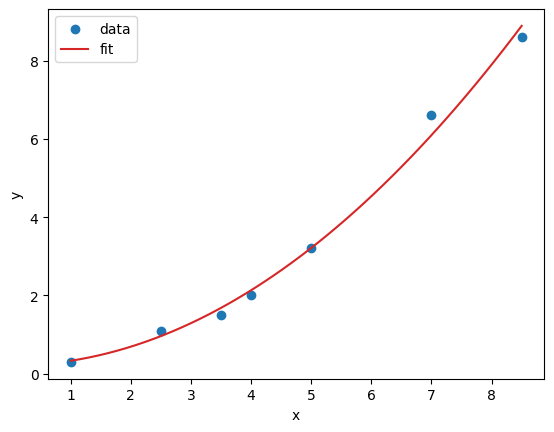

In [50]:
x_fit = np.linspace(x[0],x[-1])
y_fit = ply2(x_fit,p_curv[0],p_curv[1])
plt.scatter(x,y,label='data')
plt.plot(x_fit,y_fit,label='fit',c='tab:red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()